导入所需模块。

In [1]:
import pandas as pd
import numpy as np
import requests as rq
import tweepy as tp
import simplejson as json
import matplotlib.pyplot as plt

# 1.数据收集

## 1.1  收集手头文件

定义WeRateDogs 的推特档案转换后的dataframe文件为df_t.

In [2]:
df_t = pd.read_csv(r'data_sets\twitter-archive-enhanced.csv')
df_t.shape

(2356, 17)

## 1.2  从互联网下载文件

定义神经网络预测狗品种的文件为response.

In [3]:
response = rq.get('https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv')

新建tsv文件prediction.tsv,并在其中写入response内容。

In [4]:
with open('data_sets\prediction.tsv', mode= 'wb') as file:
    file.write(response.content)

定义神经网络预测狗品种的数据转换后的dataframe文件为df_p.

In [5]:
df_p = pd.read_csv(r'data_sets\prediction.tsv', sep='\t')
df_p.shape

(2075, 12)

## 1.3  API下载文件

定义API下载转换后的dataframe文件为df_a.

In [6]:
with open('data_sets\\tweet_json.txt', 'r') as file:
    df_a = pd.DataFrame()
    for i in file.readlines():
        dic = json.loads(i)
        df_a = df_a.append(dic, ignore_index=True)  

In [7]:
df_a.shape

(2352, 31)

# 2.数据评估

## 2.1目测评估

In [8]:
df_t

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
df_p

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


将df_p转换为csv文件以便目测评估，命名为prediction.csv。

In [10]:
df_p.to_csv('data_sets\prediction.csv', sep=',')

In [11]:
df_a

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,user,quoted_status_id,quoted_status_id_str,retweeted_status,quoted_status
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492.0,0.0,This is Phineas. He's a mystical boy. Only eve...,None,...,0.0,8842.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786.0,0.0,This is Tilly. She's just checking pup on you....,None,...,0.0,6480.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445.0,0.0,This is Archie. He is a rare Norwegian Pouncin...,None,...,0.0,4301.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863.0,0.0,This is Darla. She commenced a snooze mid meal...,None,...,0.0,8925.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016.0,0.0,This is Franklin. He would like you to stop ca...,None,...,0.0,9721.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20548.0,0.0,Here we have a majestic great white breaching ...,None,...,0.0,3240.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12053.0,0.0,Meet Jax. He enjoys ice cream so much he gets ...,None,...,0.0,2142.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66596.0,0.0,When you watch your owner call another dog a g...,None,...,0.0,19548.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28187.0,0.0,This is Zoey. She doesn't want to be one of th...,None,...,0.0,4403.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467.0,0.0,This is Cassie. She is a college pup. Studying...,None,...,0.0,7684.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN


将df_a转换为csv文件以便目测评估，命名为tweet_json.csv。

In [12]:
df_a.to_csv('data_sets\\tweet_json.csv', sep=',')

## 2.2编程评估

In [13]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df_t.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
sum(df_t.duplicated())

0

In [16]:
df_t.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
55        17
285       15
291       15
83        14
866       14
        ... 
2183       3
1314       3
1928       3
765        3
2202       3
1692       3
1478       3
1898       3
1249       3
2305       3
2079       2
2326       2
2349       2
2237       2
2246       2
1920       2
1761       2
2310       2
1764       2
1940       1
2038       1
2091       1
1869       1
1446       1
605        1
2338       1
2261       1
2335       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [17]:
df_t.rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
1228     90
1254     80
1843     80
433      70
1274     50
1351     50
1202     50
1433     40
1598     20
1165     20
1663     16
342      15
1662     11
1068     11
784      11
800      10
778      10
777      10
776      10
779      10
780      10
799      10
775      10
781      10
782      10
       ... 
1556     10
1555     10
1554     10
1553     10
1552     10
1551     10
1550     10
1549     10
1548     10
1547     10
1562     10
0        10
1571     10
1577     10
1564     10
1565     10
1566     10
1567     10
1568     10
1569     10
1570     10
1563     10
1572     10
1573     10
1574     10
1575     10
1576     10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

检查狗的评分是否与推文描述一致。

In [18]:
for i in range(len(df_t)):
    if (df_t.text[i].find(str(df_t.rating_numerator[i])) == -1) | df_t.text[i].find(str(df_t.rating_denominator[i])) == -1:
        print('score is not correct')

未出现上述字符，表示评分与推文描述一致。

In [19]:
df_t.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
df_t.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
df_t.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
df_t.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

检查狗的地位是否与推文描述一致。

In [23]:
def stage_exam(stage):
    a = []
    for i in range(len(df_t)):
        if df_t.text[i].find(stage) != -1:
            a.append(i)
    a = np.array(a)
    b = df_t[df_t[stage] == stage].index.values
    return len(a)-len(b)

In [24]:
stage_exam('doggo')

1

In [25]:
stage_exam('floofer')

-6

In [26]:
stage_exam('pupper')

15

In [27]:
stage_exam('puppo')

7

四种狗的地位列统计数据与相应行中推文数据不一致，说明狗的地位是否与推文描述不一致。

In [28]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_p.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
sum(df_p.duplicated())

0

In [31]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null float64
favorited                        2352 non-null float64
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null float64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null object
in_reply_to_user_id_str          78 non-nul

In [32]:
df_a.describe()

,favorite_count,favorited,id,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,truncated,quoted_status_id
count,2352.000000,2352.0,2.352000e+03,2352.000000,2211.0,2211.0,2352.000000,2352.0,2352.0,2.900000e+01
mean,8109.198980,0.0,7.425913e+17,0.013180,0.0,0.0,3134.932398,0.0,0.0,8.162686e+17
std,11980.795669,0.0,6.846210e+16,0.114071,0.0,0.0,5237.846296,0.0,0.0,6.164161e+16
min,0.000000,0.0,6.660209e+17,0.000000,0.0,0.0,0.000000,0.0,0.0,6.721083e+17
25%,1417.000000,0.0,6.783949e+17,0.000000,0.0,0.0,618.000000,0.0,0.0,7.888183e+17
50%,3596.500000,0.0,7.193536e+17,0.000000,0.0,0.0,1456.500000,0.0,0.0,8.340867e+17
75%,10118.000000,0.0,7.991219e+17,0.000000,0.0,0.0,3628.750000,0.0,0.0,8.664587e+17
max,132318.000000,0.0,8.924206e+17,1.000000,0.0,0.0,79116.000000,0.0,0.0,8.860534e+17


查看三个数据集有哪些重复列

In [33]:
all_columns = pd.Series(list(df_t)+list(df_p)+list(df_a))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
53                   source
dtype: object

## 2.3质量问题

### WeRateDogs 的推特档案df_t

前两行数据是2017年8月1号以后的，因为图像预测权限，无法使用。  
有181行转推内容。  
有78行回复内容。  
text列中有"floof"（与"floofer"同义），而后面的“地位”栏没有该显示。  
rating_numerator列有异常值,rating_denominator列有异常值。  
部分狗的“地位”与tweet内容里的不一致。    
timestamp列数据类型为str。  
rating_denominator列最小值为0.（可以与这两列异常值问题一并处理）  
项目要求只需要含有图片的推文，而expanded_urls列存在空值，即目前有部分推文不包含图片。

### 图像预测数据df_p

p1列值有大写有小写。

### Tweepy下载数据df_a.

前两行数据是2017年8月1号以后的，因为图像预测权限，无法使用。  
id_str列数据类型为字符串，与其他两个数据集id列类型为整型不一致。  
created_at列与df_t中timestamp列重复。  
favorite_count和retweet_count列数据类型为浮点

## 2.4整洁度问题

三个数据集都是以 tweet_id 为观察对象，所有列都是各个tweet_id 的特征。tweet_id, in_reply_to_status_id, in_reply_to_user_id, source这四列同时出现在df_t和df_a中。

### WeRateDogs 的推特档案df_t

狗“地位”（即 doggo、floofer、pupper 和 puppo）4列的列名是值，不是变量名。

# 3、数据清理

首先备份原始数据。

In [34]:
df_t_clean = df_t.copy()
df_p_clean = df_p.copy()
df_a_clean = df_a.copy()

### 3.1  定义：删除df_t_clean和df_a_clean的前两行数据。

代码：

In [35]:
df_t_clean.drop([0, 1],inplace=True)

In [36]:
df_a_clean.drop([0, 1],inplace=True)

测试：

In [37]:
df_t_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


In [38]:
df_a_clean.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,user,quoted_status_id,quoted_status_id_str,retweeted_status,quoted_status
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445.0,0.0,This is Archie. He is a rare Norwegian Pouncin...,None,...,0.0,4301.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863.0,0.0,This is Darla. She commenced a snooze mid meal...,None,...,0.0,8925.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016.0,0.0,This is Franklin. He would like you to stop ca...,None,...,0.0,9721.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20548.0,0.0,Here we have a majestic great white breaching ...,None,...,0.0,3240.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12053.0,0.0,Meet Jax. He enjoys ice cream so much he gets ...,None,...,0.0,2142.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN


### 3.2  定义：删除df_t中181行转推内容及数据集的retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp列。 

代码：

In [39]:
df_t_clean = df_t_clean[pd.isnull(df_t_clean.retweeted_status_id)].drop(columns=['retweeted_status_id',
                                                                                 'retweeted_status_user_id',
                                                                                 'retweeted_status_timestamp'])

测试：

In [40]:
df_t_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 2 to 2355
Data columns (total 14 columns):
tweet_id                 2173 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2173 non-null object
source                   2173 non-null object
text                     2173 non-null object
expanded_urls            2115 non-null object
rating_numerator         2173 non-null int64
rating_denominator       2173 non-null int64
name                     2173 non-null object
doggo                    2173 non-null object
floofer                  2173 non-null object
pupper                   2173 non-null object
puppo                    2173 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.6+ KB


### 3.3  定义：删除df_t中78行回复内容及数据集的in_reply_to_status_id, in_reply_to_user_id列。 

代码：

In [41]:
df_t_clean = df_t_clean[pd.isnull(df_t_clean.in_reply_to_status_id)].drop(columns=['in_reply_to_status_id',
                                                                                 'in_reply_to_user_id'])

测试：

In [42]:
df_t_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 2 to 2355
Data columns (total 12 columns):
tweet_id              2095 non-null int64
timestamp             2095 non-null object
source                2095 non-null object
text                  2095 non-null object
expanded_urls         2092 non-null object
rating_numerator      2095 non-null int64
rating_denominator    2095 non-null int64
name                  2095 non-null object
doggo                 2095 non-null object
floofer               2095 non-null object
pupper                2095 non-null object
puppo                 2095 non-null object
dtypes: int64(3), object(9)
memory usage: 212.8+ KB


### 3.4  定义：将df_t_clean.text，df_t_clean.floofer列中的floofer全部替换为floof并重命名floofer列为floof。

代码：

In [43]:
df_t_clean['text'] = df_t_clean['text'].str.replace('floofer', 'floof')

In [44]:
df_t_clean['floofer'] = df_t_clean['floofer'].str.replace('floofer', 'floof')

In [45]:
df_t_clean = df_t_clean.rename(columns = {'floofer': 'floof'})

测试：

In [46]:
df_t_clean['text'].str.find('floofer').mean()

-1.0

In [47]:
df_t_clean['floof'].str.find('floofer').mean()

-1.0

### 3.5 定义：删除rating_numerator值大于等于20和等于0的行，删除rating_denominator值不等于10的行。

代码：

In [48]:
df_t_clean = df_t_clean[(df_t_clean.rating_numerator < 20) & (df_t_clean.rating_numerator > 0)][df_t_clean.rating_denominator == 10]

d:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


测试：

In [49]:
df_t_clean.rating_numerator.sort_values(ascending=False)

533     14
123     14
56      14
449     14
448     14
76      14
436     14
83      14
426     14
418     14
758     14
404     14
395     14
117     14
631     14
372     14
490     14
369     14
141     14
347     14
339     14
164     14
657     14
924     14
187     14
199     14
866     14
209     14
214     14
268     14
        ..
2202     3
1601     3
765      3
2239     3
1249     3
2334     3
1478     3
2136     3
1189     3
1314     3
1406     3
2305     3
1836     3
2183     3
1947     3
1692     3
1938     3
2237     2
1764     2
2246     2
2079     2
1761     2
2326     2
1920     2
2310     2
2349     2
2261     1
1869     1
2338     1
2091     1
Name: rating_numerator, Length: 2072, dtype: int64

In [50]:
df_t_clean.rating_denominator.sort_values(ascending=False)

2355    10
923     10
888     10
889     10
891     10
892     10
893     10
894     10
896     10
897     10
898     10
899     10
900     10
901     10
903     10
904     10
905     10
906     10
907     10
909     10
910     10
912     10
913     10
914     10
915     10
916     10
917     10
918     10
919     10
920     10
        ..
1627    10
1613    10
1614    10
1615    10
1616    10
1617    10
1619    10
1620    10
1621    10
1622    10
1623    10
1624    10
1625    10
1626    10
1628    10
1645    10
1629    10
1631    10
1632    10
1633    10
1636    10
1637    10
1638    10
1639    10
1640    10
1641    10
1642    10
1643    10
1644    10
2       10
Name: rating_denominator, Length: 2072, dtype: int64

In [51]:
df_t_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 2 to 2355
Data columns (total 12 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null object
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2069 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  2072 non-null object
doggo                 2072 non-null object
floof                 2072 non-null object
pupper                2072 non-null object
puppo                 2072 non-null object
dtypes: int64(3), object(9)
memory usage: 210.4+ KB


In [52]:
df_t_clean = df_t_clean.reset_index(drop=True)

In [53]:
for i in range(0,len(df_t_clean)):
    if df_t_clean['text'][i].find(str(df_t_clean['rating_numerator'][i])) == -1:
        print(i)      

### 3.6  定义：在df_t_clean新建stage列，值是推文里提取的狗狗"地位"数据，如果一个推文里出现两个或以上的“地位”名称，则定义为multiple. 然后修改该列数据为category类型并删除doggo, floofer, pupper, puppo列。

代码：

In [54]:
stage_names = ['doggo', 'floof', 'pupper', 'puppo', 'blep', 'snoot']
num_category = []
for i in range(len(df_t_clean)):
    num = 0
    for name in stage_names:
        if df_t_clean.text[i].lower().find(name) != -1:
            df_t_clean.loc[i, 'stage'] = name 
            num = num + 1
    num_category.append(num)

In [55]:
df_t_clean.stage.loc[pd.Series(num_category)[pd.Series(num_category) == 2].index] = 'multiple' 
df_t_clean.stage.reindex(pd.Series(num_category)[pd.Series(num_category) == 2].index)

d:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


26     multiple
141    multiple
152    multiple
159    multiple
354    multiple
411    multiple
441    multiple
530    multiple
556    multiple
636    multiple
682    multiple
740    multiple
839    multiple
887    multiple
924    multiple
Name: stage, dtype: object

In [56]:
df_t_clean = df_t_clean.drop(columns=['doggo', 'floof', 'pupper', 'puppo'])

In [57]:
df_t_clean['stage'] = df_t_clean['stage'].astype('category')

测试

In [58]:
df_t_clean['stage'].value_counts()

pupper      236
doggo        77
floof        35
puppo        28
multiple     15
blep          3
Name: stage, dtype: int64

In [59]:
df_t_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 9 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null object
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2069 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  2072 non-null object
stage                 394 non-null category
dtypes: category(1), int64(3), object(5)
memory usage: 131.8+ KB


### 3.7  定义：将df_t_clean中timestamp列数据类型改为datetime.

代码：

In [60]:
df_t_clean.timestamp = pd.to_datetime(df_t_clean.timestamp)

测试：

In [61]:
df_t_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 9 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null datetime64[ns]
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2069 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  2072 non-null object
stage                 394 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(4)
memory usage: 131.8+ KB


### 3.8  定义：将df_a_clean中created_at列删除。

代码：

In [62]:
df_a_clean = df_a_clean.drop(columns = 'created_at')

测试

In [63]:
df_a_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 2 to 2351
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
display_text_range               2350 non-null object
entities                         2350 non-null object
extended_entities                2071 non-null object
favorite_count                   2350 non-null float64
favorited                        2350 non-null float64
full_text                        2350 non-null object
geo                              0 non-null object
id                               2350 non-null float64
id_str                           2350 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null object
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2350 non-nul

### 3.9 定义：将df_a_clean的id列数据类型改为整型。

代码：

In [64]:
df_a_clean.id_str = df_a_clean.id_str.astype('int64')

测试：

In [65]:
df_a_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 2 to 2351
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
display_text_range               2350 non-null object
entities                         2350 non-null object
extended_entities                2071 non-null object
favorite_count                   2350 non-null float64
favorited                        2350 non-null float64
full_text                        2350 non-null object
geo                              0 non-null object
id                               2350 non-null float64
id_str                           2350 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null object
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2350 non-null

### 3.10  将df_a_clean中的favorite_count和retweet_count列数据类型改为整型。

代码：

In [66]:
df_a_clean.favorite_count = df_a_clean.favorite_count.astype('int64')
df_a_clean.retweet_count = df_a_clean.retweet_count.astype('int64')

测试：

In [67]:
df_a_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 2 to 2351
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
display_text_range               2350 non-null object
entities                         2350 non-null object
extended_entities                2071 non-null object
favorite_count                   2350 non-null int64
favorited                        2350 non-null float64
full_text                        2350 non-null object
geo                              0 non-null object
id                               2350 non-null float64
id_str                           2350 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null object
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2350 non-null f

### 3.11  定义：清除df_a_clean的source列，保留三个数据集中的tweet_id和id列，用以合并数据集。

代码：

In [68]:
df_a_clean = df_a_clean.drop(columns = 'source')

测试

In [69]:
df_a_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 2 to 2351
Data columns (total 29 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
display_text_range               2350 non-null object
entities                         2350 non-null object
extended_entities                2071 non-null object
favorite_count                   2350 non-null int64
favorited                        2350 non-null float64
full_text                        2350 non-null object
geo                              0 non-null object
id                               2350 non-null float64
id_str                           2350 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null object
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2350 non-null f

### 3.12  定义：将df_p_clean的p1列全部改为小写

代码：

In [70]:
df_p_clean.p1 = df_p_clean.p1.str.lower()

测试：

In [71]:
df_p_clean.p1.value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
cocker_spaniel                30
malamute                      30
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            23
seat_belt                     22
siberian_husky                20
german_shepherd               20
staffordshire_bullterrier     20
cardigan                      19
web_site                      19
eskimo_dog                    18
teddy                         18
maltese_dog                   18
beagle                        18
shetland_sheepdog             18
lakeland_terrier              17
shih-tzu                      17
rottweiler                    17
kuvasz                        16
italian_greyhound             16
          

### 3.13  定义：合并三个数据集并分别导出至csv文件

代码：

取三个数据集的交集，定义总数据集df_clean。

In [72]:
df_clean = df_t_clean.merge(df_p_clean, on = 'tweet_id').merge(df_a_clean, left_on = 'tweet_id', right_on = 'id_str')

In [73]:
df_clean = df_clean.drop(columns = 'id_str')

测试：

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 48 columns):
tweet_id                         1946 non-null int64
timestamp                        1946 non-null datetime64[ns]
source                           1946 non-null object
text                             1946 non-null object
expanded_urls                    1946 non-null object
rating_numerator                 1946 non-null int64
rating_denominator               1946 non-null int64
name                             1946 non-null object
stage                            358 non-null category
jpg_url                          1946 non-null object
img_num                          1946 non-null int64
p1                               1946 non-null object
p1_conf                          1946 non-null float64
p1_dog                           1946 non-null bool
p2                               1946 non-null object
p2_conf                          1946 non-null float64
p2_dog                  

In [75]:
df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,favorited,id,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,truncated,quoted_status_id
count,1.946000e+03,1946.000000,1946.0,1946.000000,1946.000000,1.946000e+03,1.946000e+03,1946.000000,1946.0,1.946000e+03,1946.0,1946.0,1946.0,1946.000000,1946.0,1946.0,0.0
mean,7.359862e+17,10.541110,10.0,1.201953,0.594518,1.351347e-01,6.013061e-02,8939.907503,0.0,7.359862e+17,0.0,0.0,0.0,2775.290853,0.0,0.0,NaN
std,6.755792e+16,2.161739,0.0,0.558934,0.272069,1.012716e-01,5.087296e-02,12443.986174,0.0,6.755792e+16,0.0,0.0,0.0,4739.479486,0.0,0.0,NaN
min,6.660209e+17,1.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,0.0,6.660209e+17,0.0,0.0,0.0,15.000000,0.0,0.0,NaN
25%,6.758041e+17,10.000000,10.0,1.000000,0.362857,5.361625e-02,1.598680e-02,1944.500000,0.0,6.758041e+17,0.0,0.0,0.0,618.750000,0.0,0.0,NaN
50%,7.085954e+17,11.000000,10.0,1.000000,0.587797,1.184015e-01,4.933745e-02,4117.000000,0.0,7.085954e+17,0.0,0.0,0.0,1348.500000,0.0,0.0,NaN
75%,7.881713e+17,12.000000,10.0,1.000000,0.846896,1.964605e-01,9.159438e-02,11346.500000,0.0,7.881713e+17,0.0,0.0,0.0,3212.500000,0.0,0.0,NaN
max,8.918152e+17,14.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,132318.000000,0.0,8.918152e+17,0.0,0.0,0.0,79116.000000,0.0,0.0,NaN


将清洗后的3个子数据集和总数据集导出到csv文件。

In [76]:
df_t_clean.to_csv('data_sets\\twitter_archive_enhanced_clean.csv', sep=',', index=False)
df_p_clean.to_csv('data_sets\\prediction_clean.csv', sep=',', index=False)
df_a_clean.to_csv('data_sets\\tweet_json_clean.csv', sep=',', index=False)
df_clean.to_csv('data_sets\\twitter_archive_master.csv', sep=',', index=False)

### 3.14 根据不同分析目标合并相关的两个数据集

代码：

为分析不同种类狗的评分情况，合并df_t_clean和df_p_clean，得到数据集df_dogscore.

In [77]:
df_dogscore = df_t_clean.merge(df_p_clean, on = 'tweet_id')

为分析不同‘地位’狗的受欢迎程度，合并df_t_clean和df_a_clean，得到数据集df_stagepoplular.

In [78]:
df_stagepoplular = df_t_clean.merge(df_a_clean, left_on = 'tweet_id', right_on = 'id_str')

为分析每天不同时段WeRateDogs对狗的评价是否有规律，可以直接使用df_t_clean。

测试：

In [79]:
df_dogscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 20 columns):
tweet_id              1946 non-null int64
timestamp             1946 non-null datetime64[ns]
source                1946 non-null object
text                  1946 non-null object
expanded_urls         1946 non-null object
rating_numerator      1946 non-null int64
rating_denominator    1946 non-null int64
name                  1946 non-null object
stage                 358 non-null category
jpg_url               1946 non-null object
img_num               1946 non-null int64
p1                    1946 non-null object
p1_conf               1946 non-null float64
p1_dog                1946 non-null bool
p2                    1946 non-null object
p2_conf               1946 non-null float64
p2_dog                1946 non-null bool
p3                    1946 non-null object
p3_conf               1946 non-null float64
p3_dog                1946 non-null bool
dtypes: bool(3), category(1), d

In [80]:
df_stagepoplular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 38 columns):
tweet_id                         2072 non-null int64
timestamp                        2072 non-null datetime64[ns]
source                           2072 non-null object
text                             2072 non-null object
expanded_urls                    2069 non-null object
rating_numerator                 2072 non-null int64
rating_denominator               2072 non-null int64
name                             2072 non-null object
stage                            394 non-null category
contributors                     0 non-null object
coordinates                      0 non-null object
display_text_range               2072 non-null object
entities                         2072 non-null object
extended_entities                1946 non-null object
favorite_count                   2072 non-null int64
favorited                        2072 non-null float64
full_text                    

### 3.15 删除df_t_clean中expanded_urls列为空值的行，即没有图片的推文。（在上一清理步骤中，合并df_t_clean和df_p_clean时，默认采用'inner'方式，已实现该目标。）

# 4、数据分析和可视化

### 4.1 分析不同种类狗的评分情况

In [81]:
dogscore = df_dogscore[df_dogscore.p1_dog == True].groupby('p1')['rating_numerator'].mean()
dogscore = dogscore.sort_values(ascending=False)
dogscore

p1
saluki                         12.500000
briard                         12.333333
tibetan_mastiff                12.250000
border_terrier                 12.142857
silky_terrier                  12.000000
standard_schnauzer             12.000000
eskimo_dog                     11.777778
gordon_setter                  11.750000
irish_setter                   11.750000
samoyed                        11.700000
chow                           11.609756
golden_retriever               11.567164
cardigan                       11.529412
wire-haired_fox_terrier        11.500000
australian_terrier             11.500000
giant_schnauzer                11.500000
great_pyrenees                 11.461538
kelpie                         11.454545
pembroke                       11.443182
irish_water_spaniel            11.333333
norfolk_terrier                11.333333
greater_swiss_mountain_dog     11.333333
leonberg                       11.333333
siberian_husky                 11.315789
cocker_spanie

<BarContainer object of 110 artists>

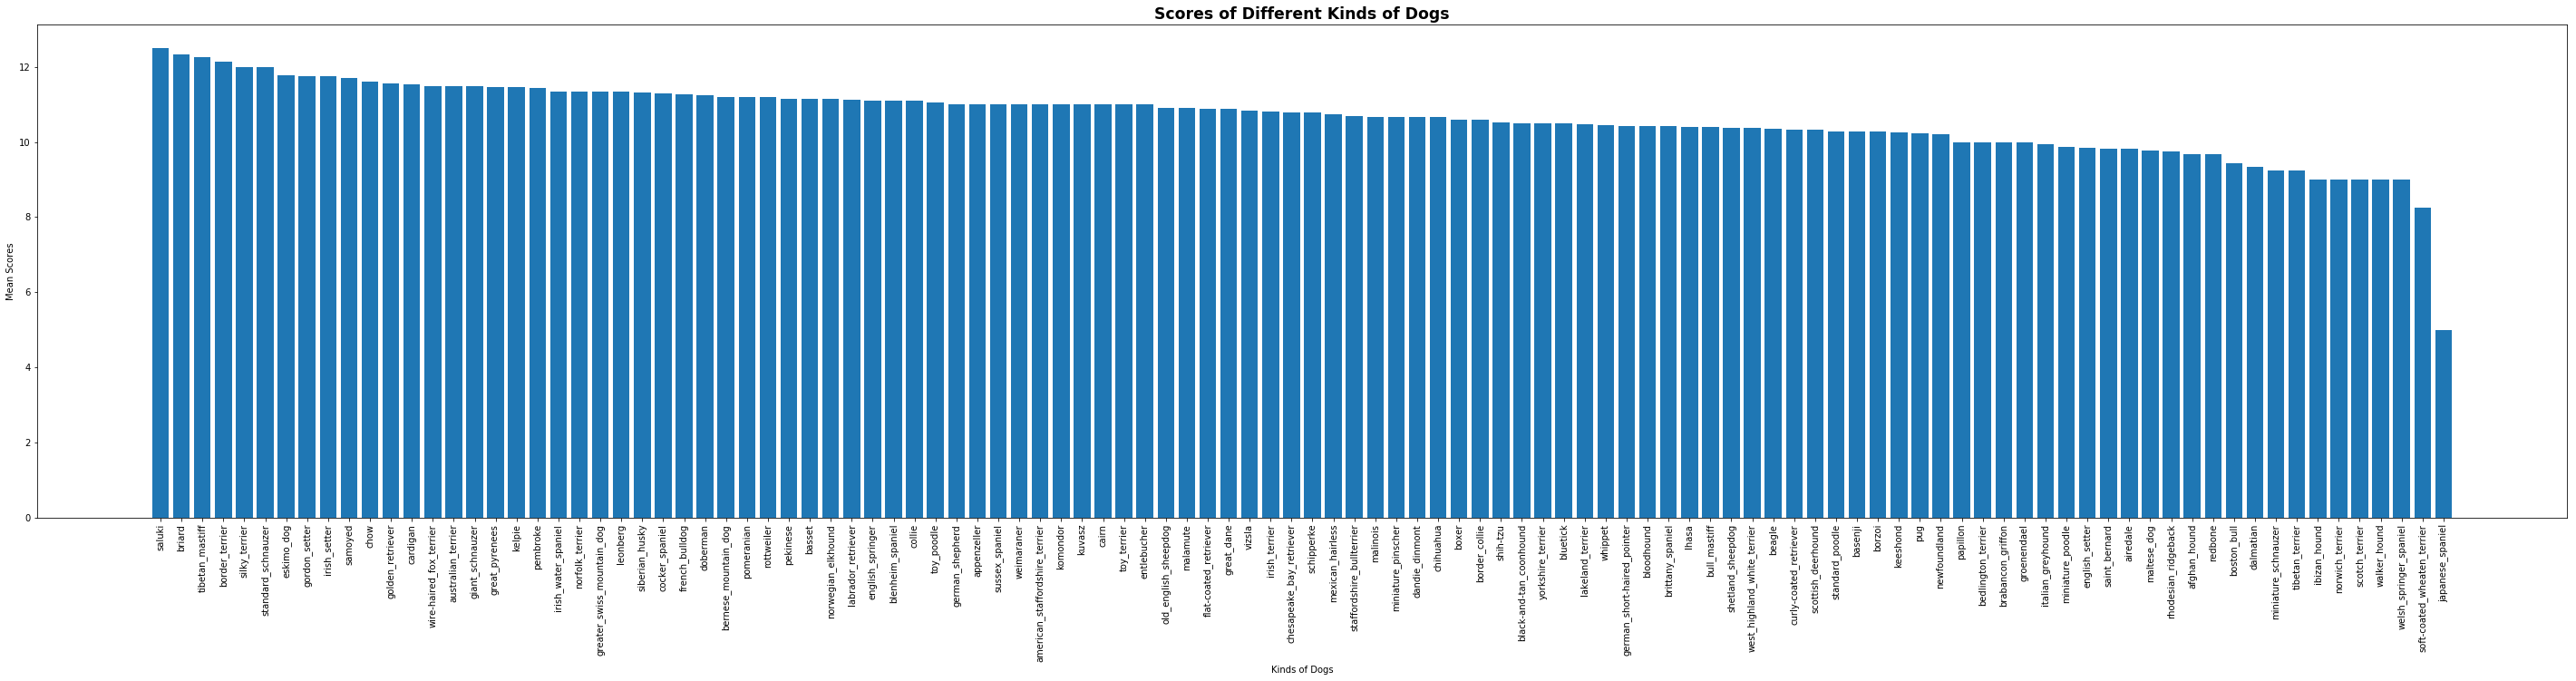

In [82]:
plt.figure(figsize=(50,10))
plt.title('Scores of Different Kinds of Dogs',fontsize='xx-large', fontweight='bold')
plt.xlabel('Kinds of Dogs')
plt.ylabel('Mean Scores')
plt.xticks(rotation=90)
plt.bar(dogscore.index, dogscore.values)

可以看到，狗狗的评分总体区别不大，排名前三位的狗依次是saluki，briard和tibetan_mastiff。

### 4.2 分析不同‘地位’狗的受欢迎程度

In [83]:
df_stagepoplular['stage_pop'] = df_stagepoplular['retweet_count'] + df_stagepoplular['favorite_count']
stagepoplular = df_stagepoplular.groupby('stage')['stage_pop'].mean().sort_values(ascending=False)
stagepoplular

stage
puppo       28305.464286
blep        24702.000000
doggo       23709.532468
multiple    20366.600000
floof       11411.657143
pupper       9588.241525
Name: stage_pop, dtype: float64

<BarContainer object of 6 artists>

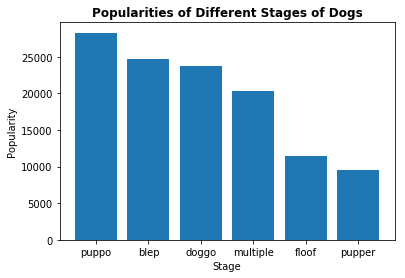

In [84]:
plt.title('Popularities of Different Stages of Dogs',fontsize='large', fontweight='bold')
plt.ylabel('Popularity')
plt.xlabel('Stage')
plt.bar(stagepoplular.index, stagepoplular.values)

可以看到，“地位”是puppo, blep和doggo的狗在tweeter上最受欢迎（喜爱和转发次数最多）。

### 4.3 分析每天不同时段WeRateDogs对狗的评价是否有规律

针对这个问题，考虑到文字数和评分分别能够间接和直接反映WeRateDogs的评价习惯，因此使用这两个变量和每天的不同小时作为时段，探索评价规律。

In [85]:
df_t_clean['hour'] = df_t_clean['timestamp'].dt.hour

在text里，结构是“评语 + 评分分子/评分分母 + 网址”，在考虑评语长度时，只需要评语部分，考虑使用分隔功能。而最简单的分隔可以使用评分分子和分母之间的‘/’符号，然后取分隔结果的第一个值。

In [86]:
df_t_clean['text_length'] = ''
for i in range(len(df_t_clean)):
    df_t_clean['text_length'].loc[i] = len(df_t_clean['text'].loc[i].split('/')[0])

d:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [87]:
df_t_clean['text_length']

0       118
1        50
2       125
3       106
4        67
5       115
6       109
7       101
8        96
9        82
10      103
11       75
12       90
13      105
14       74
15      108
16       67
17       97
18      107
19       69
20       79
21       55
22      101
23       55
24       69
25       46
26      108
27       68
28      116
29       77
       ... 
2042    111
2043    113
2044    112
2045    110
2046     42
2047     97
2048    108
2049     85
2050     89
2051    111
2052     19
2053     55
2054    107
2055    101
2056    113
2057     85
2058     78
2059     91
2060     87
2061     80
2062     99
2063     87
2064     67
2065    111
2066     90
2067     93
2068    110
2069     87
2070     85
2071     94
Name: text_length, Length: 2072, dtype: int64

In [88]:
df_t_clean['rating_numerator']

0       12
1       13
2       12
3       13
4       13
5       13
6       13
7       14
8       13
9       13
10      13
11      12
12      13
13      13
14      12
15      13
16      13
17      12
18      13
19      14
20      13
21      13
22      12
23      13
24      13
25      13
26      12
27      13
28      12
29      13
        ..
2042    10
2043     2
2044     7
2045     9
2046    11
2047     6
2048     8
2049    10
2050     9
2051     3
2052    11
2053    10
2054     1
2055    11
2056     8
2057     9
2058     6
2059    10
2060     9
2061    10
2062     8
2063     9
2064    10
2065     2
2066    10
2067     5
2068     6
2069     9
2070     7
2071     8
Name: rating_numerator, Length: 2072, dtype: int64

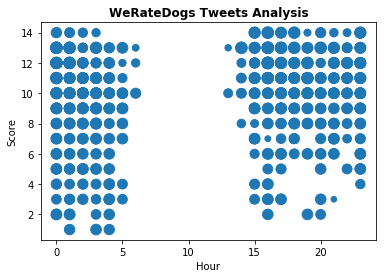

In [89]:
plt.title('WeRateDogs Tweets Analysis',fontsize='large', fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.scatter(df_t_clean['hour'], df_t_clean['rating_numerator'], s = df_t_clean['text_length'])

可以看出，WeRateDogs发推没有出现在了7点到12点。发文字数没有特别明显的规律，相对来说，低分较多地出现在0点到5点发的推文当中，在10分以上的推文中，WeRateDogs用的“笔墨”比较多。

# 5、结论

### 5.1 根据图像预测结果，各种狗的评分情况如何？

各个种类的狗的评分总体区别不大，排名前三位的狗依次是saluki，briard和tibetan_mastiff。

### 5.2 哪种“地位”的狗在tweet上最受欢迎？（标记为喜欢和转发次数最多）

“地位”是puppo, blep和doggo的狗在tweeter上最受欢迎（喜爱和转发次数最多）。

### 5.3 WeRateDogs对狗狗评价是否有规律？(每种狗在每天的不同时段被 WeRateDogs评高分和文字较多的情况)

WeRateDogs发推没有出现在7点到12点，发文字数没有特别明显的规律。相对来说，低分较多地出现在0点到5点发的推文当中，在10分以上的推文中，WeRateDogs用的“笔墨”比较多。

# 6、有限性阐述

1.在数据整理时，去除了部分空值和异常值，这将会对结果造成一定误差。

2.在分析不同‘地位’狗的受欢迎程度时，未考虑用户的文字水平，图片质量等因素，而是只考虑狗的“地位”。

3.在分析不同种类的狗的评分时，默认图像预测的第一个结果为实际情况。

# 参考资料

在1.3节API下载文件部分，参考优达论坛中用户ksyoo和用户tx2159在[该帖](http://discussions.youdaxue.com/t/json-tweet-json-txt-python/53815)中的代码。